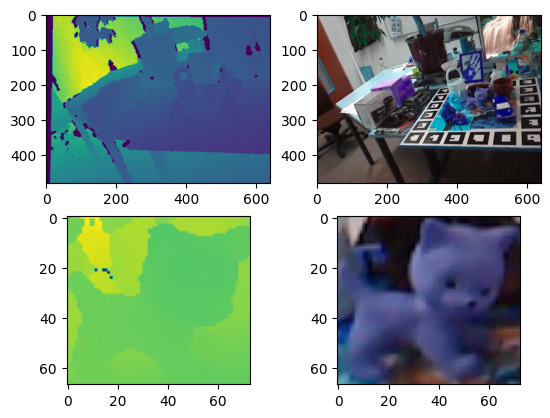

In [1]:
import cv2
import numpy as np
from high_api import *
import matplotlib.pyplot as plt
import packages.linemod.config as cfg
import packages.linemod as lm
import packages.utils as utils

depth=cv2.imread("../data/linemod/depth.png",cv2.IMREAD_UNCHANGED)
rgb=cv2.imread("../data/linemod/rgb.png")
depth_t=cv2.imread("../data/linemod/template_depth.png",cv2.IMREAD_UNCHANGED)
rgb_t=cv2.imread("../data/linemod/template_rgb.png")
plt.subplot(221)
plt.imshow(depth)
plt.subplot(222)
plt.imshow(rgb)
plt.subplot(223)
plt.imshow(depth_t)
plt.subplot(224)
plt.imshow(rgb_t)


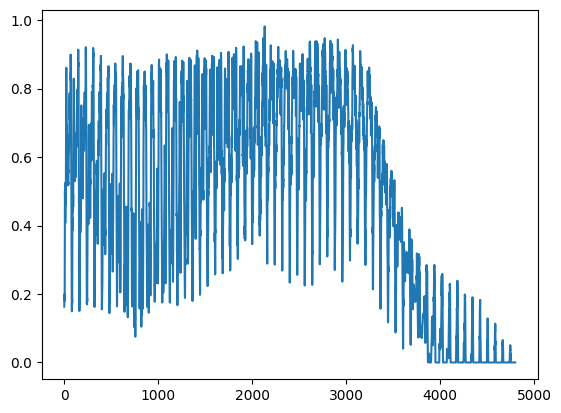

In [2]:
import high_api
rgb_template=[]
rgb_template.append(rgb_make_template(rgb_t))
rgb_feature=rgb_extract_image_feature(rgb)
rgb_response=get_response_map(rgb_feature,lm.color_config)
rgb_sim=high_api._compute_similarity(rgb_template,rgb_response)
plt.plot(rgb_sim.squeeze())

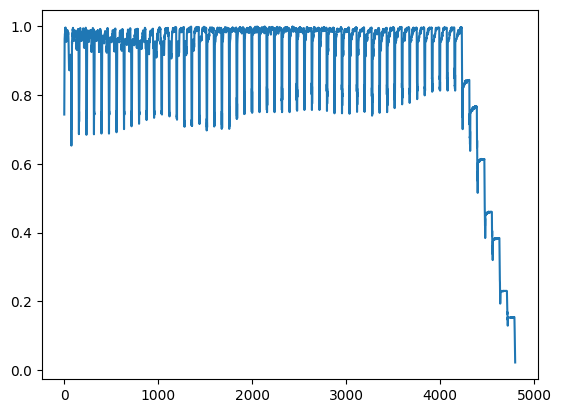

In [3]:
depth_template=[]
depth_template.append(depth_make_template(depth_t))
depth_feature=depth_extract_image_feature(depth)
depth_response=get_response_map(depth_feature,lm.depth_config)
depth_sim=high_api._compute_similarity(depth_template,depth_response)
plt.plot(depth_sim.squeeze())

[  0   1   2   4   8  16  32  64 128]


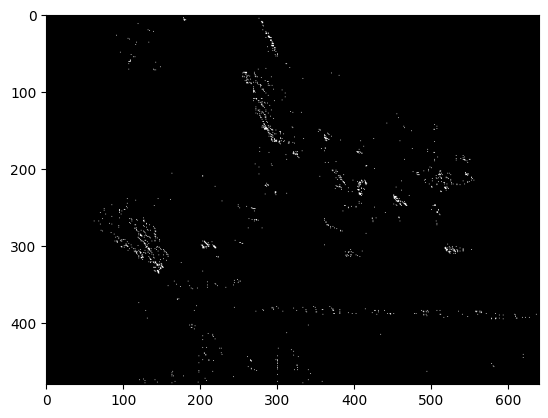

In [4]:
print(np.unique(depth_feature))
plt.imshow(depth_feature==128,'gray')

Text(0.5, 1.0, 'sim.max()=np.float64(0.9816274149563371)')

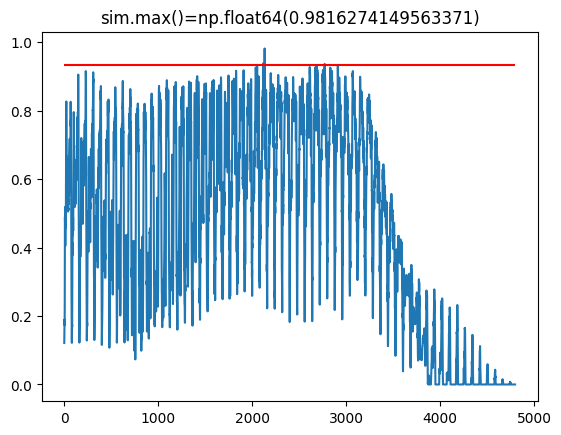

In [5]:
sim=depth_sim.squeeze()*rgb_sim.squeeze()
plt.plot(sim)
plt.hlines(0.95*sim.max(),xmin=0,xmax=len(sim),colors='r')
plt.title(f"{sim.max()=}")

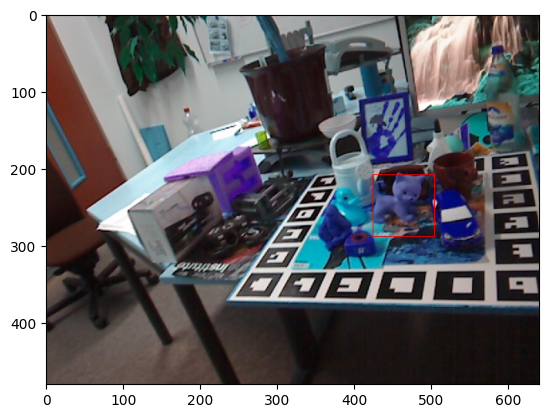

In [6]:
xs,ys,_=find_high_similar(rgb_template,rgb_response,depth_template,depth_response,0.95)
imshowd=rgb.copy()
for x,y in zip(xs,ys):
    cv2.rectangle(imshowd,(x,y),(x+80,y+80),(255,0,0),1)
plt.imshow(imshowd)